In [ ]:
from uuid import UUID
from vitalx.types import VitalEnvironmentT
from vitalx.types import VitalRegionT

environment: VitalEnvironmentT = "sandbox"
region: VitalRegionT = "us"

team_id = UUID("TEAM_ID")
user_id = UUID("USER_ID")

In [14]:
from vitalx.aggregation.executor import Executor

query_executor = Executor(
    environment=environment,
    region=region,
    team_id=team_id,
)


## Aggregation Query

In [ ]:
from datetime import date
from vitalx.aggregation import *

(chronotype_by_day,) = query_executor.query(
    RelativeTimeframe(
        type="relative",
        anchor=date.today(),
        past=Period(value=3, unit="month"),
    ),
    select(
        group_key("*"),
        Sleep.chronotype().newest(),
    ).group_by(
        date_trunc(Sleep.index(), 1, "day")
    ),

    user_id=user_id,
)


In [17]:
chronotype_by_day

group_key.0,newest
datetime[μs],str
2024-09-13 00:00:00,"""third"""
2024-09-14 00:00:00,"""third"""
2024-09-15 00:00:00,"""third"""
2024-09-16 00:00:00,"""third"""
2024-09-17 00:00:00,"""third"""
…,…
2024-12-09 00:00:00,"""third"""
2024-12-10 00:00:00,"""third"""
2024-12-11 00:00:00,"""third"""


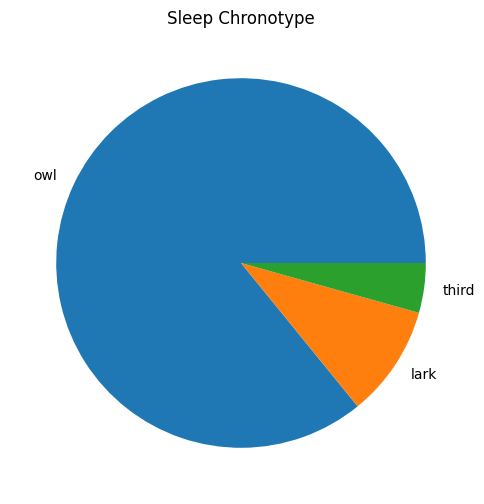

In [16]:
import matplotlib.pyplot as plt


plt.figure(figsize=(16,6))
ax = plt.gca()
plt.title("Sleep Chronotype")
plt.pie(
    chronotype_by_day.get_column("newest").unique_counts(),
    labels=chronotype_by_day.get_column("newest").unique(),
)
plt.show()